한국어 음성 데이터 가져오기
--------------------------------------

한국어 음성 데이터 구글링 해보니까 공공데이터들이 있길래 한번 알아봤음.   
근데 다들 .wav나 .mp3가 아니라 .pcm 확장자인데 librosa는 .pcm을 못 열어서 pcm파일 wav파일로 바꾸는 코드 가져옴(pcm2wav)   
16비트 선형 pcm 파일이라고 명시되어 있는데 마침 코드도 16비트로 맞춰져있음. (bit_depth=16, samplig_rate=16000)   
***

#### 밑의 코드는 샘플로 얻어온 .pcm 확장자인 한국인 음성 데이터 10개(중에 9개)를 .wav로 변환 후 mfcc 변환하는 코드(9개 모두 동일 발화자임)

AI Hub(https://aihub.or.kr/)에 한국어 음성 데이터 신청했고 출처만 밝히면 어떻게든 사용가능하다고 함. 똑같이 16비트 pcm파일.   
목소리는 주파수뿐 아니라 악센트, 음색처럼 특성이 많은데 한국어 음성 데이터 쓰는게 더 좋을거 같다는 판단??   
데이터 받으면 앞뒤 공백 자르고 길이 맞춰서 mfcc 변환한 다음에 resnet에 넣는거 다음주나 늦으면 다다음주까지 하면 될듯 해

In [1]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

In [10]:
### mp3 파일을 librosa로 읽어와서 오디오 신호의 정보와 그림, 플레이어를 그리는 함수

def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player

    Notebook: C1/B_PythonAudio.ipynb

    Args:
        x: Input signal
        Fs: Sampling rate of x
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

In [12]:
### .pcm 파일을 .wav 파일로 바꾸는 함수
import wave

# The parameters are prerequisite information. More specifically,
# channels, bit_depth, sampling_rate must be known to use this function.
def pcm2wav( pcm_file, wav_file, channels=1, bit_depth=16, sampling_rate=16000 ):

    # Check if the options are valid.
    if bit_depth % 8 != 0:
        raise ValueError("bit_depth "+str(bit_depth)+" must be a multiple of 8.")
        
    # Read the .pcm file as a binary file and store the data to pcm_data
    with open( pcm_file, 'rb') as opened_pcm_file:
        pcm_data = opened_pcm_file.read();
        
        obj2write = wave.open( wav_file, 'wb')
        obj2write.setnchannels( channels )
        obj2write.setsampwidth( bit_depth // 8 )
        obj2write.setframerate( sampling_rate )
        obj2write.writeframes( pcm_data )
        obj2write.close()

In [13]:
### 가져올 .pcm 파일 경로랑 저장할 .wav 파일 경로 지정하고 변환(저장). 문자열 포맷팅에 능숙하지가 않아서 10번째꺼 뺐음. 양해좀 ㅎ
for i in range(1, 10):
    pcm_path = 'dataset_pcm/Korean/SW201105KTRNGSF03031LJH000{num}.pcm'.format(num=i)
    wav_path = 'dataset_wav/voice{num}.wav'.format(num=i)
    pcm2wav( pcm_path, wav_path, 1, 16, 16000 )

voice1
MP3 file:  Fs = 16000, x.shape = (125158,), x.dtype = float32


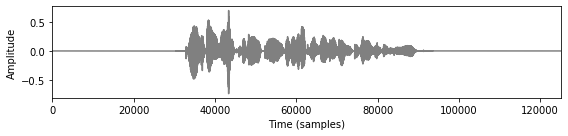

(20, 245)
voice2
MP3 file:  Fs = 16000, x.shape = (108440,), x.dtype = float32


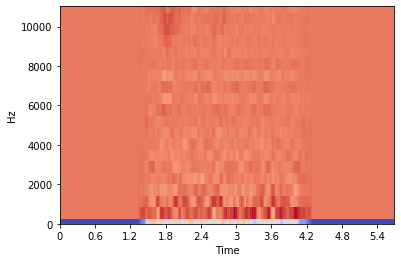

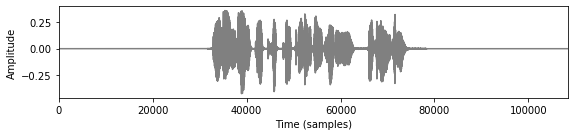

(20, 212)
voice3
MP3 file:  Fs = 16000, x.shape = (108440,), x.dtype = float32


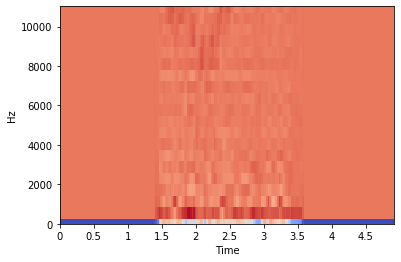

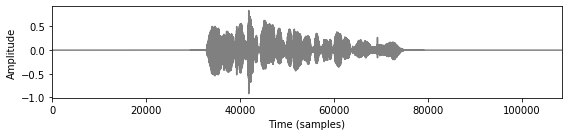

(20, 212)
voice4
MP3 file:  Fs = 16000, x.shape = (123904,), x.dtype = float32


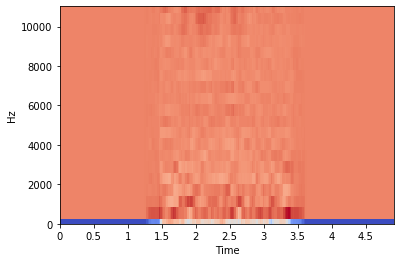

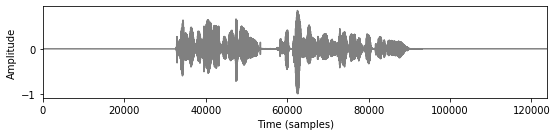

(20, 243)
voice5
MP3 file:  Fs = 16000, x.shape = (119306,), x.dtype = float32


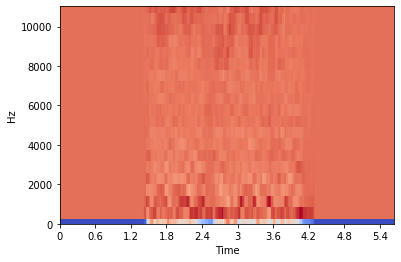

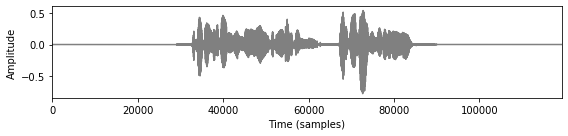

(20, 234)
voice6
MP3 file:  Fs = 16000, x.shape = (101564,), x.dtype = float32


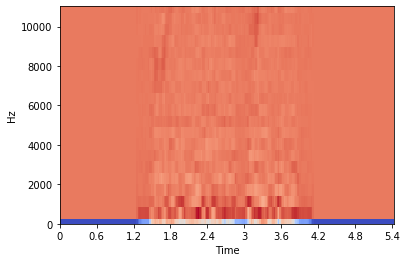

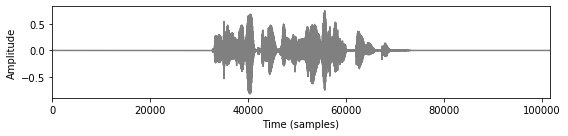

(20, 199)
voice7
MP3 file:  Fs = 16000, x.shape = (111783,), x.dtype = float32


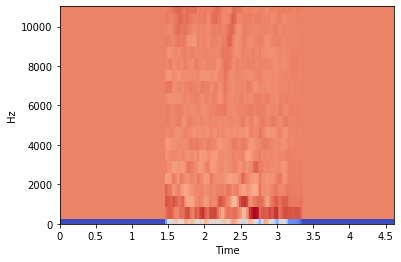

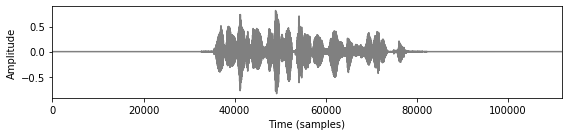

(20, 219)
voice8
MP3 file:  Fs = 16000, x.shape = (129337,), x.dtype = float32


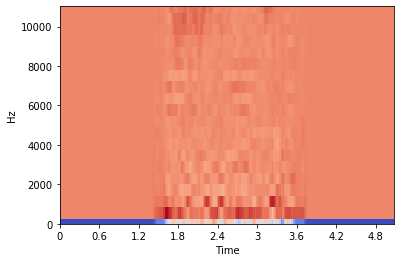

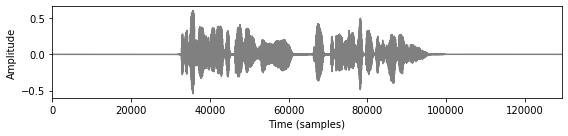

(20, 253)
voice9
MP3 file:  Fs = 16000, x.shape = (125994,), x.dtype = float32


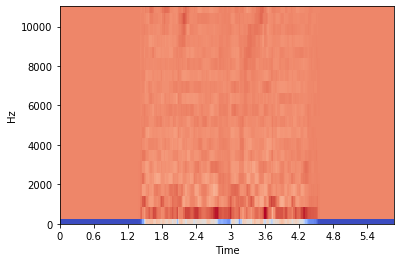

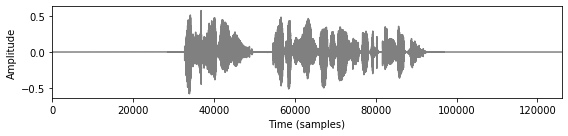

(20, 247)


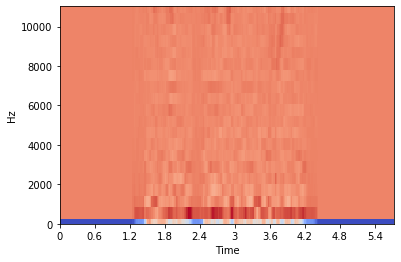

In [15]:
### 변환한 .wav 파일 mfcc로 변환. 발화자가 같아서 비슷한 형태지만 다른게 보인다!!
for i in range(1, 10):
    print('voice{num}'.format(num=i))
    path_mp3 = 'dataset_wav/voice{num}.wav'.format(num=i)
    x, Fs = librosa.load(path_mp3, sr=None)
    print_plot_play(x=x, Fs=Fs, text='MP3 file: ')
    mfcc = librosa.feature.mfcc(y=x)
    librosa.display.specshow(mfcc, x_axis='time', y_axis='linear')
    print(mfcc.shape)